In [1]:
#!pip install graphviz

In [2]:
import pandas as pd
import sklearn
import mglearn
import numpy as np
import graphviz
import matplotlib.pyplot as plt
import os
os.environ["PATH"] += os.pathsep + "/opt/homebrew/bin"

In [3]:
parkinsonsData = pd.read_csv('parkinsons_updrs.csv')

# Get the column names of the DataFrame and convert them to a list
feature_names = parkinsonsData.columns.tolist()

#declare the features/predictor variables, everything except target variable
X = parkinsonsData.drop(columns=['total_UPDRS'])

#declare the target variable
y = parkinsonsData[['total_UPDRS']]

In [4]:
 #### Linear regression 

In [5]:

# Recall X are y are the features and target variables respevtively

#split data into testing and training set
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, random_state=42)
linearRegression = sklearn.linear_model.LinearRegression().fit(X_train, y_train)
print("Linear Regression")
print("Training set score: {:.3f}".format(linearRegression.score(X_train, y_train))) #R² score for training set
print("Test set score/R^2: {:.3f}".format(linearRegression.score(X_test, y_test)))  #R² score for test set
print("Linear Regression coefficients:", linearRegression.coef_) #prints coefficients of linear regression model. Coefficients represent weights assigned to features in the model.
print("Linear Regression intercept:", linearRegression.intercept_) #baseline prediction for the model. value of target variable when eveything else is 0



print("\nLasso Regression")
lasso = sklearn.linear_model.Lasso(alpha=0.001, max_iter=10000).fit(X_train, y_train)
print("lasso Training set score: {:.3f}".format(lasso.score(X_train, y_train))) #R² score for training set
print("lasso Test set score/R^2: {:.3f}".format(lasso.score(X_test, y_test)))#R² score for test set
print("lasso Number of features used:", np.sum(lasso.coef_ != 0))
print("lasso Coefficients:",lasso.coef_)



print("\nRidge Regression")
# Ridge regression with alpha=0.001
ridge = sklearn.linear_model.Ridge(alpha=0.001).fit(X_train, y_train)
print("ridge Training set score: {:.3f}".format(ridge.score(X_train, y_train))) #R² score for training set
print("ridge Test set score: {:.3f}".format(ridge.score(X_test, y_test)))#R² score for test set



Linear Regression
Training set score: 0.910
Test set score/R^2: 0.910
Linear Regression coefficients: [[ 4.39920397e-02  7.07220636e-02 -1.72698290e+00  2.74523751e-03
   1.21037961e+00 -2.73892596e+02  1.62007727e+04  8.04353411e+03
   1.80543702e+01 -2.55157921e+03 -3.73415925e+01 -1.56464595e-02
   1.21567427e+04  1.01920416e+02 -4.93666102e+01 -4.05453548e+03
  -2.66825429e+00 -7.04966370e-02  2.83941589e+00 -2.99609279e+00
  -3.68271136e+00]]
Linear Regression intercept: [1.30632589]

Lasso Regression
lasso Training set score: 0.909
lasso Test set score/R^2: 0.908
lasso Number of features used: 13
lasso Coefficients: [ 3.87264283e-02  6.62662021e-02 -1.80859051e+00  2.60273767e-03
  1.20722956e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -9.11307139e-01
  0.00000000e+00  0.00000000e+00 -2.00478417e+01  5.47113260e+00
  6.07509810e-01 -9.02815375e-02  2.54672372e+00 -1.99457378e+00
 -3.18538952e+00]

Ridge Regression
ridge Tra

In [6]:
# Decision Tree 

In [7]:

tree = sklearn.tree.DecisionTreeRegressor(max_depth=5, random_state=42).fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))


Accuracy on training set: 0.962
Accuracy on test set: 0.958


In [8]:
X_train.head(3)

,subject#,age,sex,test_time,motor_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
1041,7,72,0,14.306,15.461,0.00531,0.000055,0.00178,0.00238,0.00534,...,0.267,0.01396,0.01624,0.02182,0.04187,0.021833,20.626,0.70845,0.60337,0.23560
4727,35,71,0,55.427,36.630,0.00495,0.000036,0.00224,0.00291,0.00671,...,0.228,0.01341,0.01635,0.02180,0.04023,0.007720,22.305,0.42067,0.74879,0.24196
4822,35,71,0,153.530,35.375,0.00516,0.000033,0.00245,0.00293,0.00736,...,0.374,0.02093,0.02582,0.03197,0.06280,0.015832,19.644,0.47005,0.69337,0.24513


In [9]:
y_train.head(3)


,total_UPDRS
1041,23.308
4727,54.630
4822,53.917


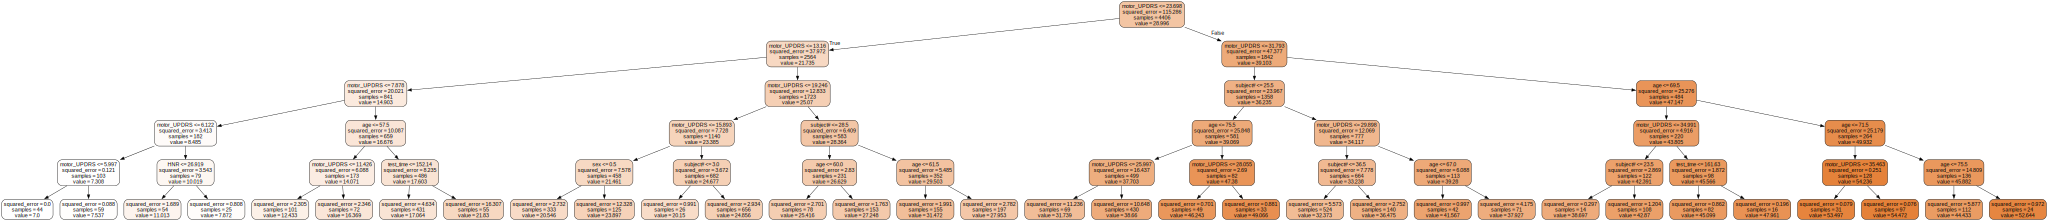

In [10]:
#Show the decision tree

dot_data = sklearn.tree.export_graphviz(
    tree, 
    feature_names=X.columns, 
    filled=True, 
    rounded=True
)
graph = graphviz.Source(dot_data)
graph


In [11]:
# Gradient Boosted Regression Trees 
#ChatGPT was used to assist in the first 3 lines
gradientBoosted = sklearn.ensemble.GradientBoostingRegressor(random_state=42).fit(X_train, y_train.to_numpy().ravel())
test_accuracy = gradientBoosted.score(X_test, y_test.to_numpy().ravel()) 
train_accuracy = gradientBoosted.score(X_train, y_train.to_numpy().ravel())
print("Accuracy on training set: {:.3f}".format(train_accuracy))
print("Accuracy on test set: {:.3f}".format(test_accuracy))


Accuracy on training set: 0.988
Accuracy on test set: 0.986


In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred.shape

#Plot the residuals
#Residuals are plotted against the target variable
#If linear regression model is a good fit, there should be random scatter plots around zero
plt.scatter(y_pred,y_test - y_pred, alpha=0.4)
plt.xlabel("motor_UPDRS")
plt.ylabel("Residual")
plt.title ("Residual Plot (linear Regression)")
plt.show

NameError: name 'LinearRegression' is not defined